In [1]:
import warnings
warnings.filterwarnings('ignore')

Importing libraires

In [2]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.util import ngrams
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense,Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential

Download packages

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KING\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KING\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KING\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Import data

In [6]:
data=pd.read_csv(r'D:\python\toolsProject\mental_health.csv\mental_health.csv')
data

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


Get informations about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


Display firat 5 rows

In [8]:
data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


Display last 5 rows

In [9]:
data.tail()

,text,label
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1
27976,got nudes person might might know snapchat do ...,0


Check null values

In [10]:
data.isnull()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
27972,False,False
27973,False,False
27974,False,False
27975,False,False


In [11]:
data.isnull().sum()

text     0
label    0
dtype: int64

Check duplicates

In [12]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27972    False
27973    False
27974    False
27975    False
27976    False
Length: 27977, dtype: bool

In [13]:
data.duplicated().sum()

5

Drop duplicates

In [14]:
data = data.drop_duplicates()

In [15]:
data

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


Describe the data

In [16]:
data.describe()

,label
count,27972.000000
mean,0.494709
std,0.499981
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Display random samples

In [17]:
def random_sample_reviews(data, num_samples):
    samples = data.groupby('label')['text'].apply(lambda x: x.sample(num_samples))
    samples_data = samples.reset_index().drop(columns='level_1')
    return samples_data
pd.set_option('display.max_colwidth', 200)
samples = random_sample_reviews(data, num_samples=3)
samples.head(6)

,label,text
0,0,anything girl boy bus stand recieves text girl girl boy waiting bus girlokay hurry boy waits faster
1,0,legend andrei konchalovskys towering half hour poem siberia begin once must hold back space takes time roundabout explorations halfremembered childhood memories turnofthecentury backwoods village...
2,0,basil rathbone nigel bruce sherlock holmes dr watson respectively second universal series established means written prologue famed detective legendary spans time helps comfortably set things prese...
3,1,happy right nowi everything going right now caring family girlfriend car place live good school amazing job seems like feel anything car crash recently car totalled people would distraught upset w...
4,1,mom killed th birthdayitll two years christmas ive thinking lately man of man get here talked family since aunts uncles two dozen cousins looking thoughts literally comments appreciated thanks ad...
5,1,dad slapped facebut completely deserved it piece fucking shit im hopeless pathetic


Check URLs

In [18]:
def contains_url(text):
    URL_pattern = r'(?i)\b(?:http[s]?|ftp|www)\S+|(?<=\w)(https?://|www\.)\S+'
    return bool(re.search(URL_pattern, str(text)))
    
rows_with_URL = data[data['text'].apply(contains_url)]
print(rows_with_URL)

count_URL = rows_with_URL.shape[0]
print(f"Number of rows contains URLs: {count_URL}")

                                                                                                                                                                                                          text  \
59                                                                   hello anyone feeling suicidal hear people lying truth httpswwwyoutubecomwatchvjkcjcbtqehttpswwwyoutubecomwatchvjkcjcbtqe feel suicidal go   
115    help needed save man assuming posts case young boy still trending social media extremists trying get young man lynched vocal opinion hashtag trending twitter accuses blasphemy extremists spamming ...   
150    answer question previous reviewer asked name us official mentioned lumumba name character mr carlucci frank carlucci reported time second secretary us embassy congo subsequently among assignments ...   
215                                                            cool bug facts classmate owns clothing line idea lol proof heres link intrested which im sure don

Remove URLs

In [19]:
def remove_urls(text):
    return re.sub(r'(?i)\b(?:http[s]?|ftp|www)\S+|(?<=\w)(https?://|www\.)\S+', '', str(text))
data['text'] = data['text'].apply(remove_urls)
print(data['text']) 

0                                                                        dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math
1                                                                                          nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
2        music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...
3        im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy no...
4        worried  year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl  years lives uk 

In [20]:
def contains_url(text):
    URL_pattern = r'(?i)\b(?:http[s]?|ftp|www)\S+|(?<=\w)(https?://|www\.)\S+'
    return bool(re.search(URL_pattern, str(text)))
    
rows_with_URL = data[data['text'].apply(contains_url)]
print(rows_with_URL)

count_URL = rows_with_URL.shape[0]
print(f"Number of rows contains URLs: {count_URL}")

Empty DataFrame
Columns: [text, label]
Index: []
Number of rows contains URLs: 0


In [21]:
specific_row = 59 
print(f"Displaying cleaned text for row {specific_row}:")
print(data['text'].iloc[specific_row])

Displaying cleaned text for row 59:
hello anyone feeling suicidal hear people lying truth  feel suicidal go


Check special characters

In [22]:
def has_special_characters(text):
    special_char_pattern = r'[^A-Za-z0-9\s]' 
    return bool(re.search(special_char_pattern, str(text)))  

rows_with_special_chars = data[data['text'].apply(has_special_characters)]
print(rows_with_special_chars)

count_special_chars = rows_with_special_chars.shape[0]
print(f"Number of rows with special characters: {count_special_chars}")

                                                                                                                                                                                                          text  \
110                           take story  snapchat posted happy birthday_name person_ didnt look story didnt click it didnt say thank didnt look message anything why take story cause embarrassing avoided it   
124                                                                                                                    help think started war cult full apple enthusiast anyways join kingdom rbanana_kingdom_   
221    dbz fans annoying hell can beat goku one cares ill watching anime maybe looking anime tik toks talking cool powerful one faves are one fuckers come start ranting cant beat goku realise absolutely ...   
224    partner may end life tonight goes goi made post earlierhttpwwwredditcomrdepressioncommentsxzei_nearly_destroyed_a_year_relationship_i_feel cheated partne

Remove special characters

In [23]:
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', str(text))
data['text'] = data['text'].apply(remove_special_characters)
print(data['text'])  

0                                                                        dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math
1                                                                                          nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
2        music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...
3        im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy no...
4        worried  year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl  years lives uk 

In [24]:
def has_special_characters(text):
    special_char_pattern = r'[^A-Za-z0-9\s]' 
    return bool(re.search(special_char_pattern, str(text)))  

rows_with_special_chars = data[data['text'].apply(has_special_characters)]
print(rows_with_special_chars)

count_special_chars = rows_with_special_chars.shape[0]
print(f"Number of rows with special characters: {count_special_chars}")

Empty DataFrame
Columns: [text, label]
Index: []
Number of rows with special characters: 0


In [25]:
specific_row = 275
print(f"Displaying cleaned text for row {specific_row}:")
print(data['text'].iloc[specific_row])

Displaying cleaned text for row 275:
wish chose criminology subject soooo interesting      


Check numbers

In [26]:
def has_numbers(text):
    return bool(re.search(r'\d', str(text)))  

rows_with_numbers = data[data['text'].apply(has_numbers)]
print(rows_with_numbers)

count_numbers = rows_with_numbers.shape[0]
print(f"Number of rows with numbers: {count_numbers}")

Empty DataFrame
Columns: [text, label]
Index: []
Number of rows with numbers: 0


Check upper_case

In [27]:
def has_uppercase(text):
    return bool(re.search(r'[A-Z]', str(text)))  

rows_with_uppercase = data[data['text'].apply(has_uppercase)]
print(rows_with_uppercase)

count_uppercase = rows_with_uppercase.shape[0]
print(f"Number of rows with uppercase letters: {count_uppercase}")

Empty DataFrame
Columns: [text, label]
Index: []
Number of rows with uppercase letters: 0


Check if it starts with @ ou #

In [28]:
def start_with(text):
    return bool(re.search(r'[@#]\w+', str(text)))

rows_start_with = data[data['text'].apply(start_with)]
print(rows_start_with)

count_start_with = rows_start_with.shape[0]
print(f"Number of rows with words starting with @ or #: {count_start_with}")

Empty DataFrame
Columns: [text, label]
Index: []
Number of rows with words starting with @ or #: 0


Check punctuations

In [29]:
def punctuation(text):
    return bool(re.search(r'[^\w\s]',str(text)))

rows_with_puntuations = data[data['text'].apply(punctuation)]
print(rows_with_puntuations)

count_punctuation = rows_with_puntuations.shape[0]
print(f"Number of rows with punctuations: {count_punctuation}")

Empty DataFrame
Columns: [text, label]
Index: []
Number of rows with punctuations: 0


Tokenization

In [30]:
def tokenize_text(text):
    text = str(text)
    tokens = word_tokenize(text)
    return tokens

tokenized_texts = data['text'].apply(tokenize_text)

for original, tokenized in zip(data['text'].head(), tokenized_texts.head()):
    print(f"Original: {original}\nTokenized: {tokenized}\n")

Original: dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math
Tokenized: ['dear', 'american', 'teens', 'question', 'dutch', 'person', 'heard', 'guys', 'get', 'way', 'easier', 'things', 'learn', 'age', 'us', 'sooooo', 'thth', 'graders', 'like', 'right', 'guys', 'learn', 'math']

Original: nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
Tokenized: ['nothing', 'look', 'forward', 'lifei', 'dont', 'many', 'reasons', 'keep', 'going', 'feel', 'like', 'nothing', 'keeps', 'going', 'next', 'day', 'makes', 'want', 'hang', 'myself']

Original: music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper i

In [31]:
data

,text,label
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,0
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself,1
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...,0
3,im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost take meds go therapy no...,1
4,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electro...,1
...,...,...
27972,posting everyday people stop caring religion matter private thing allowed share it force others also people treated diferently religions belief pearson stopped seeks harm humans care others relig...,0
27973,okay definetly need hear guys opinion ive pretty much love one best friends now im m shes f met lot summer pretty much always asked wanted meet always wanted never asked me also slow responds mess...,0
27974,cant get dog think ill kill myselfthe last thing im holding for yup first two applications didnt work already received many one looking for sent third one different place dont hopes high up,1
27975,whats point princess bridei really think like wesley said pb life pain ampxb life sucks hurts live get better joy temporary think people happy successful fulfilled lives thats cards me wish dead e...,1


Check stopwords

In [32]:
def contains_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text_tokens = text.split()
    return any(word.lower() in stop_words for word in text_tokens)

rows_with_stopwords = data[data['text'].apply(contains_stopwords)]
print(rows_with_stopwords)

count_stopwords = rows_with_stopwords.shape[0]
print(f"Number of rows with stopwords: {count_stopwords}")

                                                                                                                                                                                                          text  \
1                                                                                        nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself   
2      music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...   
3      im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy no...   
4      worried  year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl  years lives u

Remove stopwords

In [33]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(str(text))  
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

data['text'] = data['text'].apply(remove_stopwords)

print(data['text'])

0                                                                         dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math
1                                                                                                 nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang
2        music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...
3        im done trying feel betterthe reason im still alive know mum devastated ever killed ever passes im still state im going hesitate ending life shortly im almost take meds go therapy nothing seems he...
4        worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk li

In [34]:
def contains_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text_tokens = text.split()
    return any(word.lower() in stop_words for word in text_tokens)

rows_with_stopwords = data[data['text'].apply(contains_stopwords)]

count_stopwords = rows_with_stopwords.shape[0]
print(f"Number of rows with stopwords: {count_stopwords}")

Number of rows with stopwords: 0


Stemming

In [35]:
stemmer = PorterStemmer()

def contains_stemmed_words(text):
    tokens = word_tokenize(str(text))  
    return any(stemmer.stem(word) != word for word in tokens)

rows_with_stemmed_words = data[data['text'].apply(contains_stemmed_words)]
print(rows_with_stemmed_words)

count_stemmed_words = rows_with_stemmed_words.shape[0]
print(f"Number of rows with stemmed words: {count_stemmed_words}")

                                                                                                                                                                                                          text  \
0                                                                       dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math   
1                                                                                               nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang   
2      music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...   
3      im done trying feel betterthe reason im still alive know mum devastated ever killed ever passes im still state im going hesitate ending life shortly im a

In [36]:
stemmer=PorterStemmer()
def apply_stemming(text):
    tokens = word_tokenize(str(text))  
    stemmed_tokens = [stemmer.stem(word) for word in tokens]  
    return ' '.join(stemmed_tokens)  

data['text'] = data['text'].apply(apply_stemming)
print(data['text'])

0                                                                              dear american teen question dutch person heard guy get way easier thing learn age us sooooo thth grader like right guy learn math
1                                                                                                                noth look forward lifei dont mani reason keep go feel like noth keep go next day make want hang
2        music recommend im look expand playlist usual genr alt pop minnesota hip hop steampunk variou indi genr artist peopl like cavetown aliceband bug hunter penelop scott variou rhymesay will explor ne...
3        im done tri feel betterth reason im still aliv know mum devast ever kill ever pass im still state im go hesit end life shortli im almost take med go therapi noth seem help enough dont want around ...
4        worri year old girl subject domest physicalment housewithout go lot know girl know girl etc let give brief background known girl year live uk live differ c

In [37]:
stemmer = PorterStemmer()

def contains_stemmed_words(text):
    tokens = word_tokenize(str(text))  
    return any(stemmer.stem(word) != word for word in tokens)

rows_with_stemmed_words = data[data['text'].apply(contains_stemmed_words)]
print(rows_with_stemmed_words)

count_stemmed_words = rows_with_stemmed_words.shape[0]
print(f"Number of rows with stemmed words: {count_stemmed_words}")

                                                                                                                                                                                                          text  \
2      music recommend im look expand playlist usual genr alt pop minnesota hip hop steampunk variou indi genr artist peopl like cavetown aliceband bug hunter penelop scott variou rhymesay will explor ne...   
3      im done tri feel betterth reason im still aliv know mum devast ever kill ever pass im still state im go hesit end life shortli im almost take med go therapi noth seem help enough dont want around ...   
4      worri year old girl subject domest physicalment housewithout go lot know girl know girl etc let give brief background known girl year live uk live differ countri kept touch electron mean first gir...   
6      feel like someon need hear tonight feel right think cant anyth peopl keep pute listen life everyon els live someon tell unabl someth work get done say wr

Lemmatization

In [38]:
lemmatizer = WordNetLemmatizer()

def contains_lemmatization(text):
    tokens = word_tokenize(str(text))  
    return any(lemmatizer.lemmatize(word) != word for word in tokens)

rows_with_lemmatization = data[data['text'].apply(contains_lemmatization)]
print(rows_with_lemmatization)

count_lemmatization = rows_with_lemmatization.shape[0]
print(f"Number of rows with stemmed words: {count_lemmatization}")

                                                                                                                                                                                                          text  \
0                                                                            dear american teen question dutch person heard guy get way easier thing learn age us sooooo thth grader like right guy learn math   
3      im done tri feel betterth reason im still aliv know mum devast ever kill ever pass im still state im go hesit end life shortli im almost take med go therapi noth seem help enough dont want around ...   
4      worri year old girl subject domest physicalment housewithout go lot know girl know girl etc let give brief background known girl year live uk live differ countri kept touch electron mean first gir...   
5      hey rredflag sure right place post goe im current student intern sandia nation lab work survey help improv market outreach effort mani school recruit aro

In [39]:
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    tokens = word_tokenize(str(text))  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization
    return ' '.join(lemmatized_tokens)  # Rejoin tokens into a string

data['text'] = data['text'].apply(apply_lemmatization)

print(data['text'])

0                                                                               dear american teen question dutch person heard guy get way easier thing learn age u sooooo thth grader like right guy learn math
1                                                                                                                noth look forward lifei dont mani reason keep go feel like noth keep go next day make want hang
2        music recommend im look expand playlist usual genr alt pop minnesota hip hop steampunk variou indi genr artist peopl like cavetown aliceband bug hunter penelop scott variou rhymesay will explor ne...
3        im done tri feel betterth reason im still aliv know mum devast ever kill ever pas im still state im go hesit end life shortli im almost take med go therapi noth seem help enough dont want around a...
4        worri year old girl subject domest physicalment housewithout go lot know girl know girl etc let give brief background known girl year live uk live differ c

In [40]:
lemmatizer = WordNetLemmatizer()

def contains_lemmatization(text):
    tokens = word_tokenize(str(text))  
    return any(lemmatizer.lemmatize(word) != word for word in tokens)

rows_with_lemmatization = data[data['text'].apply(contains_lemmatization)]
print(rows_with_lemmatization)

count_lemmatization = rows_with_lemmatization.shape[0]
print(f"Number of rows with stemmed words: {count_lemmatization}")

                                                                                                                                                                                                          text  \
3      im done tri feel betterth reason im still aliv know mum devast ever kill ever pas im still state im go hesit end life shortli im almost take med go therapi noth seem help enough dont want around a...   
5      hey rredflag sure right place post goe im current student intern sandia nation lab work survey help improv market outreach effort mani school recruit around countri look current undergradgrad stem...   
45     start feel like endiv marri year give take last wife affair guy tri leav move keep come back guilt decid go back lost job day thanksgiv lucki enough land two interview get offer day thanksgiv leas...   
53     fail colleg know long post yo repeat exam im sure fail second time im sure get colleg major friend gt peopl left citi countri parent live km away anyon g

Word frequency

In [41]:
def get_word_frequencies(text):
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    return word_freq

for text in data['text'].head():
    word_freq = get_word_frequencies(text)
    print(f"Text: {text}")
    print("Word Frequencies:", word_freq)
    print("-" * 50)
    

Text: dear american teen question dutch person heard guy get way easier thing learn age u sooooo thth grader like right guy learn math
Word Frequencies: Counter({'guy': 2, 'learn': 2, 'dear': 1, 'american': 1, 'teen': 1, 'question': 1, 'dutch': 1, 'person': 1, 'heard': 1, 'get': 1, 'way': 1, 'easier': 1, 'thing': 1, 'age': 1, 'u': 1, 'sooooo': 1, 'thth': 1, 'grader': 1, 'like': 1, 'right': 1, 'math': 1})
--------------------------------------------------
Text: noth look forward lifei dont mani reason keep go feel like noth keep go next day make want hang
Word Frequencies: Counter({'noth': 2, 'keep': 2, 'go': 2, 'look': 1, 'forward': 1, 'lifei': 1, 'dont': 1, 'mani': 1, 'reason': 1, 'feel': 1, 'like': 1, 'next': 1, 'day': 1, 'make': 1, 'want': 1, 'hang': 1})
--------------------------------------------------
Text: music recommend im look expand playlist usual genr alt pop minnesota hip hop steampunk variou indi genr artist peopl like cavetown aliceband bug hunter penelop scott variou rh

In [42]:
data

,text,label
0,dear american teen question dutch person heard guy get way easier thing learn age u sooooo thth grader like right guy learn math,0
1,noth look forward lifei dont mani reason keep go feel like noth keep go next day make want hang,1
2,music recommend im look expand playlist usual genr alt pop minnesota hip hop steampunk variou indi genr artist peopl like cavetown aliceband bug hunter penelop scott variou rhymesay will explor ne...,0
3,im done tri feel betterth reason im still aliv know mum devast ever kill ever pas im still state im go hesit end life shortli im almost take med go therapi noth seem help enough dont want around a...,1
4,worri year old girl subject domest physicalment housewithout go lot know girl know girl etc let give brief background known girl year live uk live differ countri kept touch electron mean first gir...,1
...,...,...
27972,post everyday peopl stop care religion matter privat thing allow share forc other also peopl treat difer religion belief pearson stop seek harm human care other religion,0
27973,okay definetli need hear guy opinion ive pretti much love one best friend im she f met lot summer pretti much alway ask want meet alway want never ask also slow respond messag she slow repli other...,0
27974,cant get dog think ill kill myselfth last thing im hold yup first two applic didnt work alreadi receiv mani one look sent third one differ place dont hope high,1
27975,what point princess bridei realli think like wesley said pb life pain ampxb life suck hurt live get better joy temporari think peopl happi success fulfil live that card wish dead everi day keep wi...,1


Saving the data

In [43]:
data.to_csv('mental_health_After.csv', index=False)

Modeling


first of all I want to know the values of the labels (target) to see if the data is balanced or not

In [44]:
data.label.value_counts()

label
0    14134
1    13838
Name: count, dtype: int64

In [45]:
X = data['text']
y = data['label']

Splitting the data into train and test with ratio 80:20

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

The next preprocessing ensures that all text samples are converted into uniform, numeric sequences suitable for input into a neural network.

In [47]:
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization

maxVocab=None
text_lengths = [len(text.split()) for text in X_train]

percentile_95 = np.percentile(text_lengths, 95)
maxLength=int(percentile_95)

# TextVectorization
text_vectorizer = TextVectorization(
    max_tokens=maxVocab,  
    output_mode="int",
    output_sequence_length=maxLength
)

In [48]:
# Adapt the text vectorizer
text_vectorizer.adapt(X_train)

In [49]:
words = text_vectorizer.get_vocabulary()
maxVocabLength = len(words)

In [50]:
# Define the model
inputs = layers.Input(shape=(1,), dtype="string", name="text_input")  
x = text_vectorizer(inputs)  
x = layers.Embedding(
    input_dim=maxVocabLength,  # Embedding layer vocabulary size
    output_dim=300,  # Embedding dimensions
    input_length=maxLength,  # Sequence length
    name="embedding_layer"
)(x)
x = layers.LSTM(64, return_sequences=True)(x)  # First LSTM layer
x = layers.LSTM(64)(x)  # Second LSTM layer
x = layers.Dense(64, activation="relu")(x)  # Dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)  # Output layer

model_1LSTM = tf.keras.Model(inputs, outputs, name="text_classification_model")


In [ ]:
# Compile the model
model_1LSTM.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Train the model
history = model_1LSTM.fit(
    X_train, y_train,  
    validation_data=(X_test, y_test), 
    epochs=5  )

Epoch 1/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 139s 194ms/step - accuracy: 0.5664 - loss: 0.6612 - val_accuracy: 0.7905 - val_loss: 0.5142
Epoch 2/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 133s 190ms/step - accuracy: 0.7523 - loss: 0.5384 - val_accuracy: 0.5240 - val_loss: 0.6917
Epoch 3/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 134s 191ms/step - accuracy: 0.5719 - loss: 0.6504 - val_accuracy: 0.8701 - val_loss: 0.3417
Epoch 4/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 134s 192ms/step - accuracy: 0.9068 - loss: 0.2550 - val_accuracy: 0.9147 - val_loss: 0.2190
Epoch 5/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 134s 191ms/step - accuracy: 0.9586 - loss: 0.1239 - val_accuracy: 0.9113 - val_loss: 0.2227


we get that the accuracy of our model is 95%

In [52]:
y_pred = model_1LSTM.predict(X_test)

175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step


some metrics to evaluate our model (Confusion matrix and classification report)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_binary = (y_pred > 0.5).astype(int).flatten()
cm=confusion_matrix(y_test,y_pred_binary)
cm

array([[2582,  245],
       [ 251, 2517]], dtype=int64)

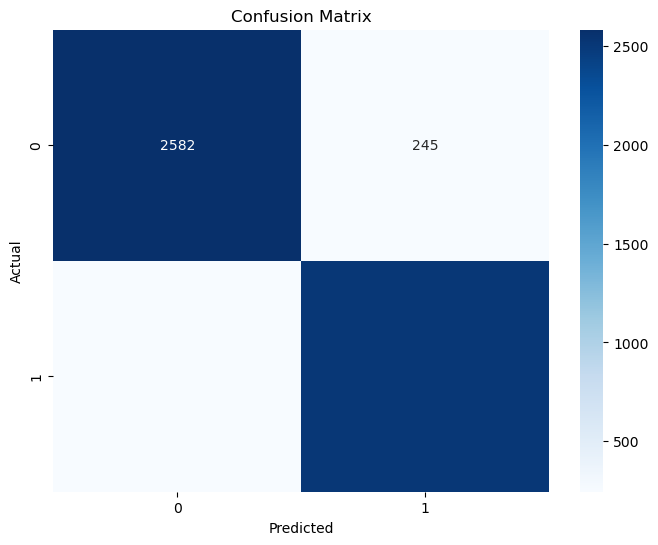

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2827
           1       0.91      0.91      0.91      2768

    accuracy                           0.91      5595
   macro avg       0.91      0.91      0.91      5595
weighted avg       0.91      0.91      0.91      5595



Now I want to test our model

In [57]:
! pip install colorama
from colorama import Fore, Style
def random_predictions(model_1LSTM,X_test,y_test,num_samples=5,class_names=None):
    randomChoice=np.random.choice(np.arange(len(X_test)),size=num_samples, replace=False)
    randomX = X_test.iloc[randomChoice].values
    randomY=y_test.iloc[randomChoice].values
    y_predRandom=model_1LSTM.predict(randomX)
    y_predRandomRes = np.squeeze(np.round(y_predRandom).astype(int))
    for i in range(num_samples):
        text=randomX[i]
        true=randomY[i]
        predictedLabel=y_predRandomRes[i]
        if class_names is not None:
            true_label_name = class_names[true]
            predicted_label_name = class_names[predictedLabel]
        else:
            true_label_name = true
            predicted_label_name = predictedLabel
        text_color = Fore.GREEN if true == predictedLabel else Fore.RED

        print(f"\nSample {i + 1}:")
        print(f"Text: {text}")
        print(text_color + f"True: {true_label_name} \n Predicted: {predicted_label_name}" + Style.RESET_ALL)

Random sample is generated to test and see the output of our model compared to the actual one

In [58]:
data = {
    'Label': ["Non-mental-health", "Mental-health"],
    'Label Encoded': [0,1]
}
data=pd.DataFrame(data)
class_names=data.Label.to_list()
random_predictions(model_1LSTM,
                   X_test,
                   y_test,
                   num_samples=20,
                   class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step

Sample 1:
Text: hold threadim stay home dad day medic pot grower night marri two kid wife work dispensari home kid oldest almost day consist wake hungri babi three year old wife get readi work wake non stop alarm bang around morn matter late im care grow everi morn take care babi morn im bitch either good enough job kidshous mayb gone late last night must cheatingthroughout day blow phone ask constantli ask cheat ive notic random peopl suspici drive slowli past hous clearli tri see never dishonest ever even receiv complement woman sinc weve togeth idk alway think im cheat get home get complaint made dinner someth might miss clean even kid wet home hour without chang im ignor phone till fall asleep lone grow room wallow pathet depress feel worthless dead insid ive lost peopl feel like ever love year im sure deserv much pain im sick path im go what make even harder know babi taken care well im gone cant dad im worthless cant anyth right destroy eve

we conclude that out of 20 sample 2 is wrong and this is good to prevent overfitting 